In [2]:
# Imports
#from Audio_Processing.cqt_chroma_extractor import CQT_Chroma_Extractor
#from Audio_Processing.melody_extractor import Melody_Extractor
#import librosa
#import librosa.display
import numpy as np
import scipy.io.wavfile as wavfile
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from Audio_Processing.audio_utils import *
import time
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, paired_euclidean_distances
from sklearn import preprocessing
from scipy.spatial import distance
from Data_Management.dataset import Dataset
import librosa.display


In [31]:
#Funcions utilitzades
# Centering:
def crop(melody):
	print melody.shape
	if melody.shape>10000:
		return melody[0:10000]
	else:
		return melody

# No 0's:
def center_mel(melody):
	print "0's",melody[melody[:]==0].shape
	return melody[melody[:]!=0]



class Detector(object):
	"""
	Loads dataset
	Param:
		path
	"""

	def __init__(self, only_chroma = False, only_melody = False):
		self.only_chroma = only_chroma
		self.only_melody = only_melody

	def compare(self, feat_song, feat_query, subseq):
		# Let's look for alignment:

		#For melodies, subseq= False
		#For chromas, subseq = True
		print " input 1 shape: {} \n".format(feat_song.shape)
		print " input 2 shape: {}\n".format(feat_query.shape)
		if subseq:
			D, wp = librosa.sequence.dtw(feat_song, feat_query, subseq=subseq)
			dist=np.sum(paired_euclidean_distances(feat_song[:,wp[:,0]], feat_query[:,wp[:,1]]))
			D = 0
			dist = np.divide(dist**2,feat_song[:,wp[:,0]].shape[1])
			wp = 0
		else:
			feat_song = np.transpose(feat_song)
			feat_query = np.transpose(feat_query)
			D, wp = librosa.sequence.dtw(feat_song, feat_query, subseq=True)
			dist = self.get_dist(feat_song[:,wp[:,0]], feat_query[:,wp[:,1]])
			D = 0
			wp = 0
		return dist

	def get_dist(self, x, y,):
		print x == y
		print x.shape
		# Efficient distance computation no loops ;)
		#return np.sqrt(np.dot(x, x) - 2 * np.dot(x, y) + np.dot(y, y))
		'''
		dist = -2 * np.sum(np.dot(x, y.T),axis=1) + np.sum(x**2, axis=1) + np.sum(y**2, axis=1)
		print np.dot(x, y.T).shape

		dist = np.sum(dist)
		'''

		dist = distance.euclidean(np.squeeze(x),np.squeeze(y))
		print dist
		return np.divide(np.sum(dist)**2,np.squeeze(x).shape)



def get_deltas(matrix):
	print "Pre-delta shape: {}".format(matrix.shape)
	deltas = librosa.feature.delta(matrix,order=2, mode ='nearest')
	print "Pre-delta shape: {}".format(deltas.shape)
	return deltas


In [48]:
data_1 = np.load('../coversongs/covers32k/Rattlesnakes/tori_amos+Strange_Little_Girls+06-Rattlesnakes.npy').item()
melody_1 = center_mel(np.expand_dims(data_1['melody'],axis=0))


data_2 = np.load('../coversongs/covers32k/Abracadabra/steve_miller_band+Steve_Miller_Band_Live_+09-Abracadabra.npy').item()
melody_2 = center_mel(np.expand_dims(data_2['melody'],axis=0))


data_3 = np.load('../coversongs/covers32k/Abracadabra/sugar_ray+14_59+11-Abracadabra.npy').item()
melody_3 = center_mel(np.expand_dims(data_3['melody'],axis=0))

# NORM and CROP
melody_1 = crop(np.divide(melody_1-np.mean(melody_1),np.std(melody_1)))
melody_2 = crop(np.divide(melody_2-np.mean(melody_2),np.std(melody_2)))
melody_3 = crop(np.divide(melody_3-np.mean(melody_3),np.std(melody_3)))

# DERIVATIVE

melody_1 = get_deltas(melody_1)
melody_2 = get_deltas(melody_2)
melody_3 = get_deltas(melody_3)


# ADJUST SHAPES
melody_1 = np.expand_dims(melody_1,axis=1)
melody_2 = np.expand_dims(melody_2,axis=1)
melody_3 = np.expand_dims(melody_3,axis=1)

# TRANSPOSE BEFORE DTW
melody_1 = np.transpose(melody_1)
melody_2 = np.transpose(melody_2)
melody_3 = np.transpose(melody_3)

D, wp = librosa.sequence.dtw(melody_1, melody_2,subseq=True)


0's (40666,)
0's (27201,)
0's (29858,)
(42642,)
(50284,)
(47539,)
Pre-delta shape: (10000,)
Pre-delta shape: (10000,)
Pre-delta shape: (10000,)
Pre-delta shape: (10000,)
Pre-delta shape: (10000,)
Pre-delta shape: (10000,)


(10727, 2)
(1, 10000)


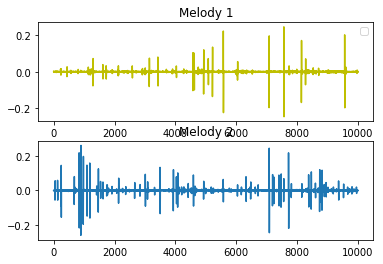

Text(0.5,1,'Aligned Melody 2')

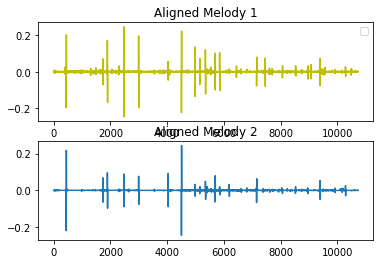

In [49]:
print wp.shape
print melody_3.shape
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Melody 1')
plt.plot(melody_1.squeeze(), color='y')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(melody_2.squeeze())
#plt.xlim([0, Y.shape[1]])
plt.title('Melody 2')
plt.show()


plt.subplot(2, 1, 1)
plt.title('Aligned Melody 1')
plt.plot(melody_1[:,wp[:,0]].squeeze(), color='y')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(melody_2[:,wp[:,1]].squeeze())
#plt.xlim([0, Y.shape[1]])
plt.title('Aligned Melody 2')


